## Class 4-1 homework: Simple supervised learning

For this assignment you will use a decision tree to figure out which type of grape was used to make each wine, starting from an analysis of 13 different aspects of chemical composition. 

This is a classic machine learning test data set, originally from [here](https://archive.ics.uci.edu/ml/datasets/wine). I've edited it to remove a space in front of each column name, though!




In [1]:
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


## Part 1: Using a decision tree to figure out which wine is which

In [7]:
# Load in wine.csv and take a look at it. We will predict the variable "wine_cultivar" 
# This variable represents the type of grape: Shiraz, merlot, pinot, etc.
df = pd.read_csv('week-4/wine.csv')
df.describe()

,wine_cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a7e4a90>,
      dtype=object)

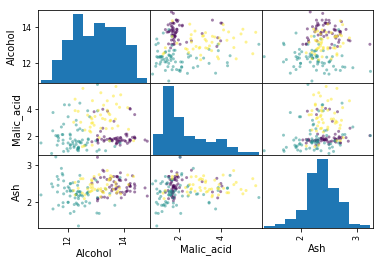

In [8]:
# First let's get an idea of the structure of this data.
# Use scatter_matrix to create a plot of the first few variables, using wine_cultivar as the color.
scatter_matrix(df[['Alcohol','Malic_acid','Ash']],c=df.wine_cultivar)

### Create test and training sets

In [10]:
# Split off a random fifth of this data to use for testing. How many rows examples are in each set?
train, test = train_test_split(df, test_size=0.2)
train.shape

(142, 14)

### Train a decision tree

In [15]:
# Create a list of the column names of the features. This is every column except the answer we are predicting.
feature_columns = df.columns[1:]
feature_columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [16]:
# Fit a decision tree to the training data
x = train[feature_columns].values
y = train[['wine_cultivar']].values

# set up decision tree
dt = tree.DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
# If you got graphviz to install correctly, draw a picture of the tree here
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dt,
                feature_names=feature_columns,
                rounded=True,
                out_file="mytree.dot")
with open("mytree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)


In [21]:
# How well does this tree do on the training data? 
# Compute the predicted wine_cultivar, and use this to print out the accuracy and confusion matrix
y_train_pred = dt.predict(x)
metrics.accuracy_score(y, y_train_pred)

1.0

In [24]:
pd.DataFrame(metrics.confusion_matrix(y, y_train_pred),
             columns=['predict 0','predict 1','predict 2'],
             index=['true 0', 'true 1', 'true 2'])

,predict 0,predict 1,predict 2
true 0,48,0,0
true 1,0,61,0
true 2,0,0,33


### Evaluate the decision tree

In [26]:
# Predict wine_cultivar on the test data. What is the accuracy and confusion matrix on the test data?
x_test = test[feature_columns].values
y_test = test[['wine_cultivar']].values

y_test_pred = dt.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9444444444444444

In [27]:
pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred),
             columns=['predict 0', 'predict 1', 'predict 2'],
             index=['true 0', 'true 1', 'true 2'])

,predict 0,predict 1,predict 2
true 0,11,0,0
true 1,0,10,0
true 2,2,0,13


## Part 2: Binary classification metrics
In this section we'll train a basic classifier on our favorite Titantic data, and then calculate some accuracy metrics for a binary predictor that we will be using over and over again in our upcoming discussion of algorithmic accountability.

Most of the code for this section is copied from the solution to Homework 3.2. This assignment is just to make sure you understand how to calculate the various accuracy metrics at the end.

For your reference, Wikipedia has an [amazing chart](https://en.wikipedia.org/wiki/Confusion_matrix) of the various things you can calculate from a binary confusion matrix.

In [28]:
# load titanic.csv once more
ti = pd.read_csv('week-4/titanic.csv')

In [29]:
# recode the pclass and gender variables so they are numeric
ti.pclass = ti.pclass.replace({'1st':1, '2nd':2, '3rd':3})
ti['female'] = ti.gender.replace({'male':0, 'female':1})

In [30]:
# Set aside a third of the data for testing.
# (Set random_state to some number to ensure we get the same split each time, 
# so everyone's answers will be the same and we can mark this easily.)
ti_train, ti_test = train_test_split(ti, test_size=0.3, random_state=42)

In [31]:
# Set up x and y variables and train a decision tree on the pclass and sex features, to predict survived
feature_columns = ['pclass','female']
ti_x = ti_train[feature_columns].values
ti_y = ti_train[['survived']].values

dt = tree.DecisionTreeClassifier()
dt.fit(ti_x,ti_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
# Create ti_test and ti_test values, and use the classifier to predict yti_test_pred
ti_x_test = ti_test[feature_columns].values
ti_y_test = ti_test[['survived']].values
ti_y_test_pred = dt.predict(ti_x_test)

In [33]:
# Print out the confusion matrix for the classifier. Use the DataFrame trick we saw in class to label the axes.
pd.DataFrame(metrics.confusion_matrix(ti_y_test, ti_y_test_pred), 
             columns=['Predicted 0','Predicted 1'],
             index=['True 0', 'True 1'])

,Predicted 0,Predicted 1
True 0,242,3
True 1,65,84


In [35]:
# Ok! What are the number of true positives, true negatives, false positives, and false negatives?
TP = 84
TN = 242
FP = 3
FN = 65

In [37]:
# Using only the varaibles TP,TN,FP,FN, calculate and print the overall accuracy
ACC = (TP + TN) / (TP + TN + FP + FN)
ACC

0.8274111675126904

In [38]:
# Check that you have your calculation right by comparing to metrics.accuracy_score
metrics.accuracy_score(ti_y_test, ti_y_test_pred)

0.8274111675126904

In [43]:
# Using only the varaibles TP,TN,FP,FN, calculate and print the false positive rate and the false negative rate
FPR = FP / (FP + TN)
FPR

0.012244897959183673

In [44]:

FNR = FN / (TP + FN)
FNR

0.436241610738255

In [46]:
# Now compute and print the precision aka positive predictive value, again from these four variables.
PPV = TP / (TP + FP)
PPV

0.9655172413793104

Explain what precision means, in words that an average reader could understand. Also explain what this particular precision value means.


Precision is how in many cases the classifier is correct in predicting the occurance of an event.

In this case: in how many cases the classifier correctly predicted the survival – here about in about 97 out of 100 cases (conversely, in 3 out of 100 cases, the classifier predicted survival, while they didn't).

## Bonus: Logistic regression classifier on the wine data
Fit a logistic regression to the same wine data. How well does it do?

In [ ]:
# Fit a LogisticRegression model to the wine data (x_train, y_trin)


In [ ]:
# How well does logistic regression do on the training data? Print the accuracy and confusion matrix


In [ ]:
# How well does logistic regression do on the test data (x_test, y_test)? Print the accuracy and confusion matrix
